In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# Load the os library
import os # https://www.tutorialsteacher.com/python/os-module
# Load the request module
import urllib.request
# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba_hw')

    # Now perform the following 100 times:
    for img_i in range(1, 101):
        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i
        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f
        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')
        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba_hw', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

000026.jpg


(218, 178, 3)

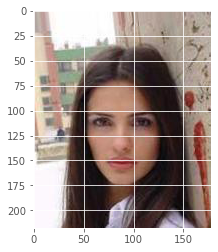

In [23]:
files = os.listdir('img_align_celeba_hw')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np
print(files[0]) # 000026.jpg
img = plt.imread(os.path.join('img_align_celeba_hw', files[0]))
%matplotlib inline
plt.imshow(img)
img.shape # (218, 178, 3): 218 rows, 178 columns, and 3 color channels c

## Change 1

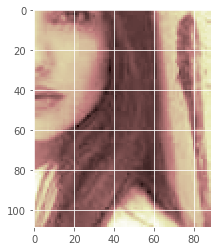

In [22]:
import math
plt.imshow(img[math.floor(218/2):,math.floor(178/2):,1], cmap = 'pink') #what's the point of using cmap?
# cmaps['Sequential (2)'] = [
            #'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            #'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            #'hot', 'afmhot', 'gist_heat', 'copper']

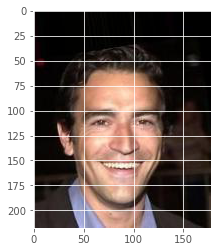

In [35]:
#have a list of imgs
files = [os.path.join('img_align_celeba_hw', file_i)
 for file_i in os.listdir('img_align_celeba_hw')
 if '.jpg' in file_i]

imgs = [plt.imread(files[file_i])
        for file_i in range(100)]
img2 = imgs[27]
plt.imshow(img2)

## Change 2

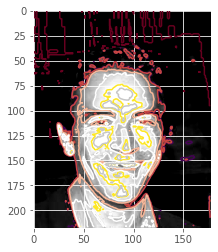

In [47]:
# change the img2 into grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img2gray = rgb2gray(img2)  
# increase contrast
plt.imshow(img2gray, cmap='gray',vmin=30, vmax=200)
# draw contour lines
plt.contour(img2gray, [50, 200]) 
plt.contour(img2[:,:,1], 5, cmap='RdGy');

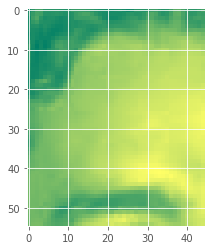

In [60]:
# Smooth the img - Interpolation
# matlablib examples: https://matplotlib.org/2.0.2/examples/images_contours_and_fields/interpolation_methods.html
img2part = img2[math.floor(218/4):math.floor(218/2),math.floor(178/4):math.floor(178/2),:]
plt.imshow(img2part[:,:,1],cmap = 'summer')

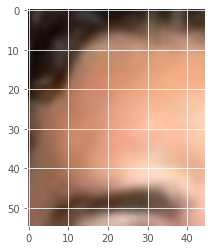

In [61]:
plt.imshow(img2part, cmap=plt.cm.gray, interpolation='bicubic') #bilinear

In [62]:
# have a numpy array of imgs
data = np.array(imgs) # make 'data' = our numpy array
print(data.shape) #100imgs, each one is 218 * 178, 3 channels


(100, 218, 178, 3)


### np statistics methods and more
https://www.dataquest.io/blog/numpy-cheat-sheet/

- np.mean(arr,axis=0) | Returns mean along specific axis
- arr.sum() | Returns sum of arr
- arr.min() | Returns minimum value of arr
- arr.max(axis=0) | Returns maximum value of specific axis
- np.var(arr) | Returns the variance of array
- np.std(arr,axis=1) | Returns the standard deviation of specific axis
- arr.corrcoef() | Returns correlation coefficient of array

This is the standard deviation - the variance of the mean


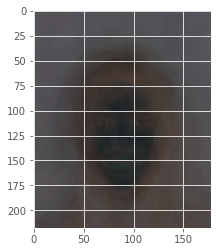

In [64]:
std_img = np.std(data, axis=0) # why axis = 0 here?
plt.imshow(std_img.astype(np.uint8))
print("This is the standard deviation - the variance of the mean")

## Change3
### Global Standarization
https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

In [82]:
mean_img = np.mean(data, axis=0) #平均
std_img = np.std(data, axis=0) #方差的算术平方根，反映组内個體間的離散程度the standard deviation - the variance of the mean
mean_of_all_colour_channels_img = np.mean(std_img, axis=2) #This is showing us on average, how every color channel will vary as a heatmap. The more red, the more likely that our mean image is not the best representation. The more blue, the less likely that our mean image is far off from any other possible image.

#global standardization of pixels
# pixels = (pixels - mean)/std
#np.subtract(arr1,arr2) ;np.divide(arr1,arr2)
sub_datamean = np.subtract(data,mean_img)

img_data = np.array(img)
print(img_data.shape)
mean = np.mean(data,axis = 0)

(218, 178, 3)
